In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
data = load_breast_cancer()

In [103]:
x = pd.DataFrame(data.data,columns= data.feature_names)
y = pd.Series(data.target)

In [104]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [106]:
print(x.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [107]:
print(y.isnull().sum())

0


In [108]:
duplicate_rows=x[x.duplicated()]
print("Duplicate Rows:"),duplicate_rows

Duplicate Rows:


(None,
 Empty DataFrame
 Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension]
 Index: []
 
 [0 rows x 30 columns])

In [109]:
duplicate_rows=y[y.duplicated()]
print("Duplicate Rows:"),duplicate_rows

Duplicate Rows:


(None,
 1      0
 2      0
 3      0
 4      0
 5      0
       ..
 564    0
 565    0
 566    0
 567    0
 568    1
 Length: 567, dtype: int32)

In [110]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

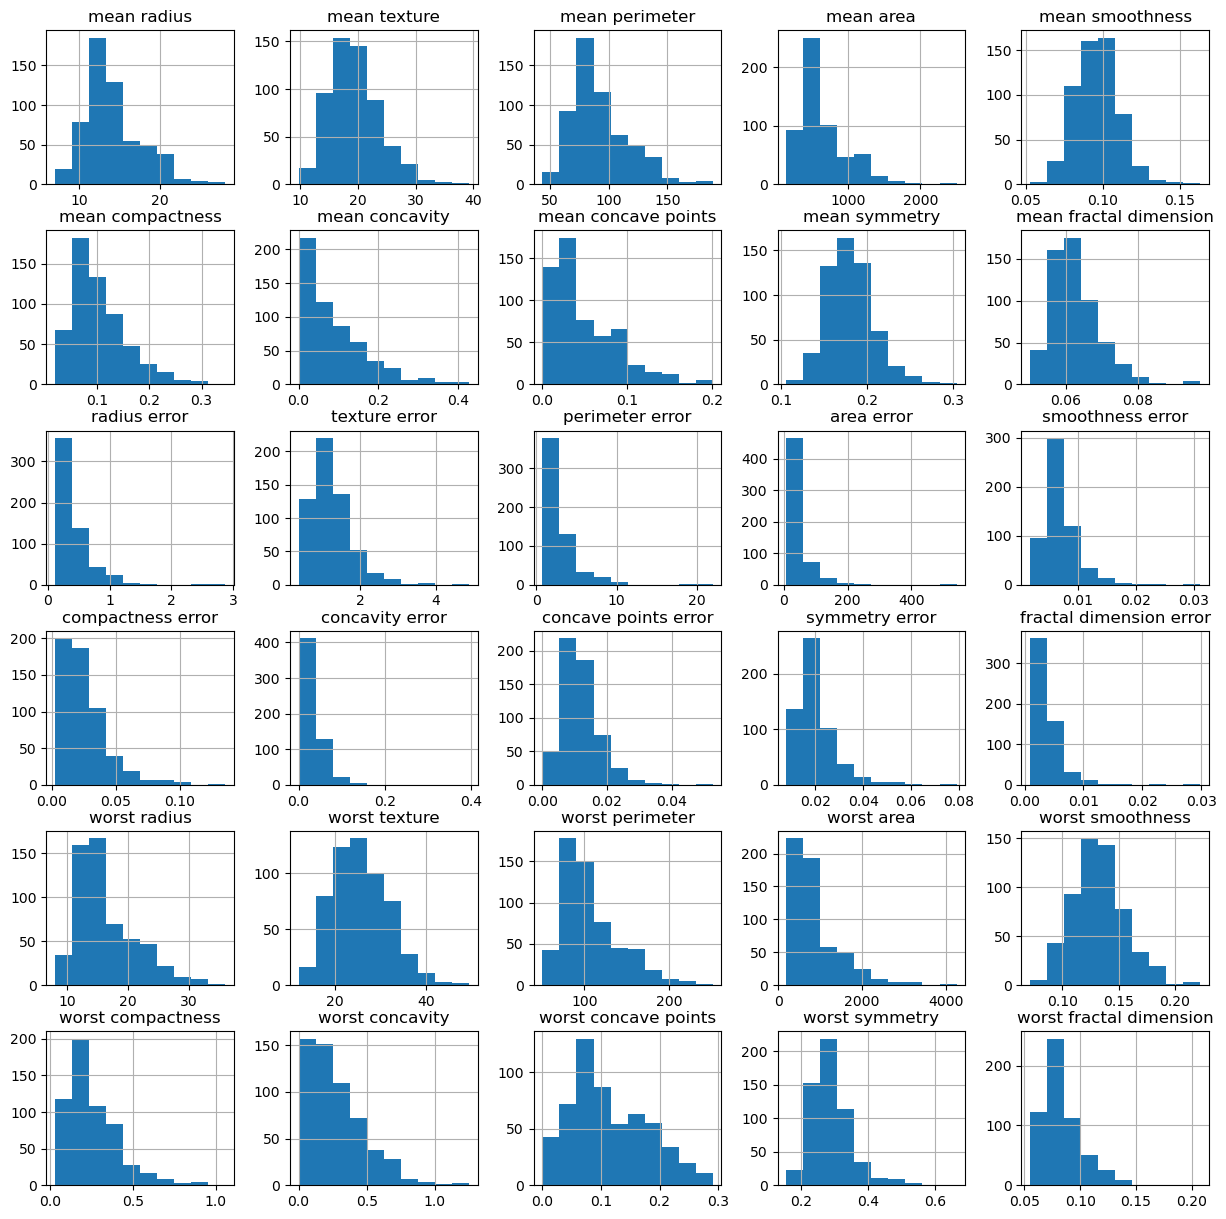

In [111]:
#histplot
x.hist(figsize=(15,15))
plt.show()

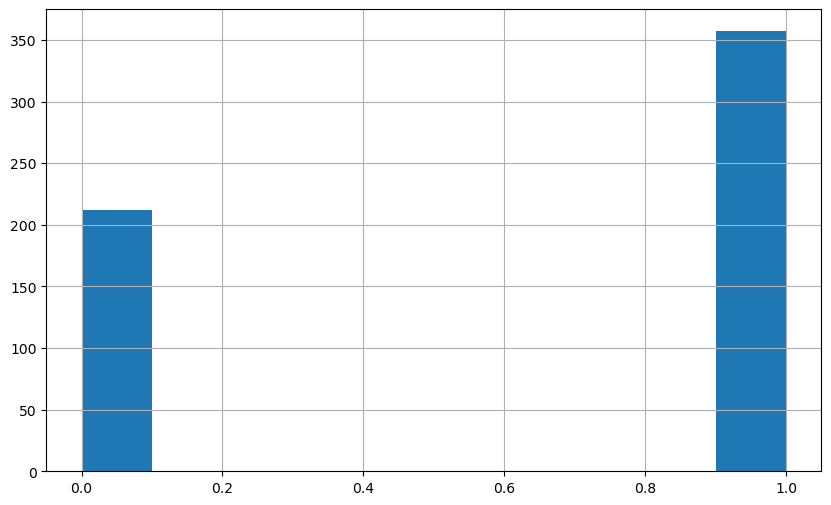

In [112]:
y.hist(figsize=(10,6))
plt.show()

In [113]:
#remove outliers
def remove_outliers_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df_filtered = df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]
    return df_filtered

In [114]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

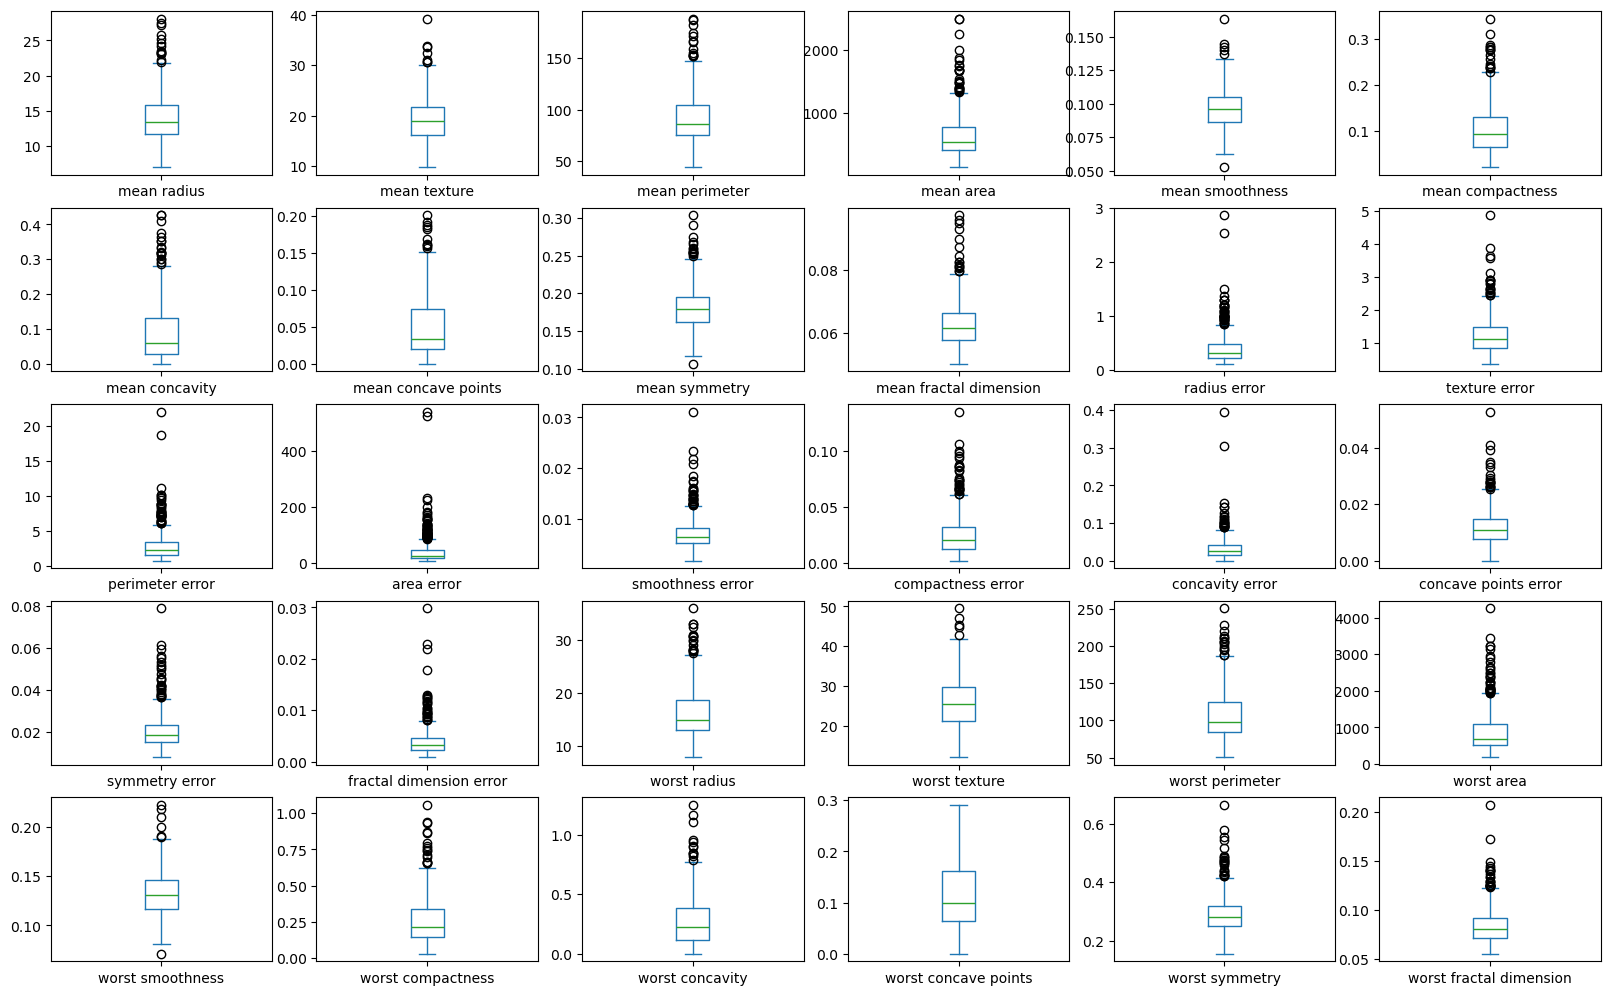

In [115]:
#boxplot
x.plot(kind='box',subplots = True, layout=(8,6),sharex = False,sharey = False, figsize=(20,20))
plt.show()

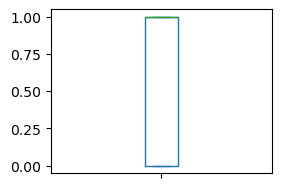

In [116]:
y.plot(kind='box',subplots = True, layout=(8,6),sharex = False,sharey = False, figsize=(20,20))
plt.show()

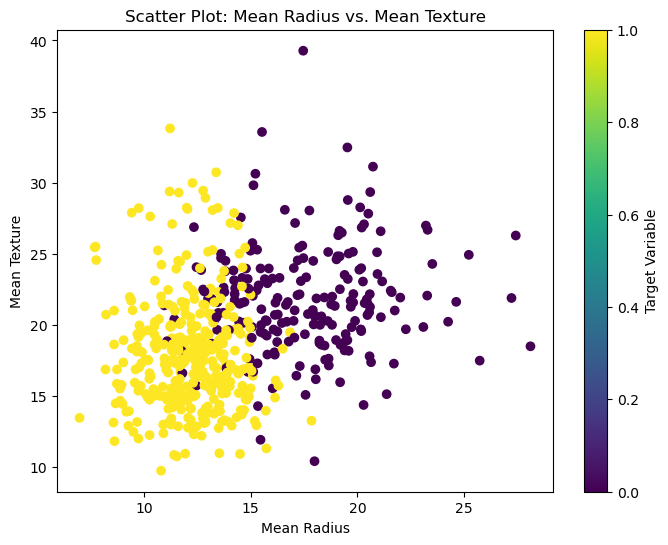

In [117]:
#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x['mean radius'], x['mean texture'], c=y, cmap='viridis')  
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Scatter Plot: Mean Radius vs. Mean Texture')
plt.colorbar(label='Target Variable')
plt.show()

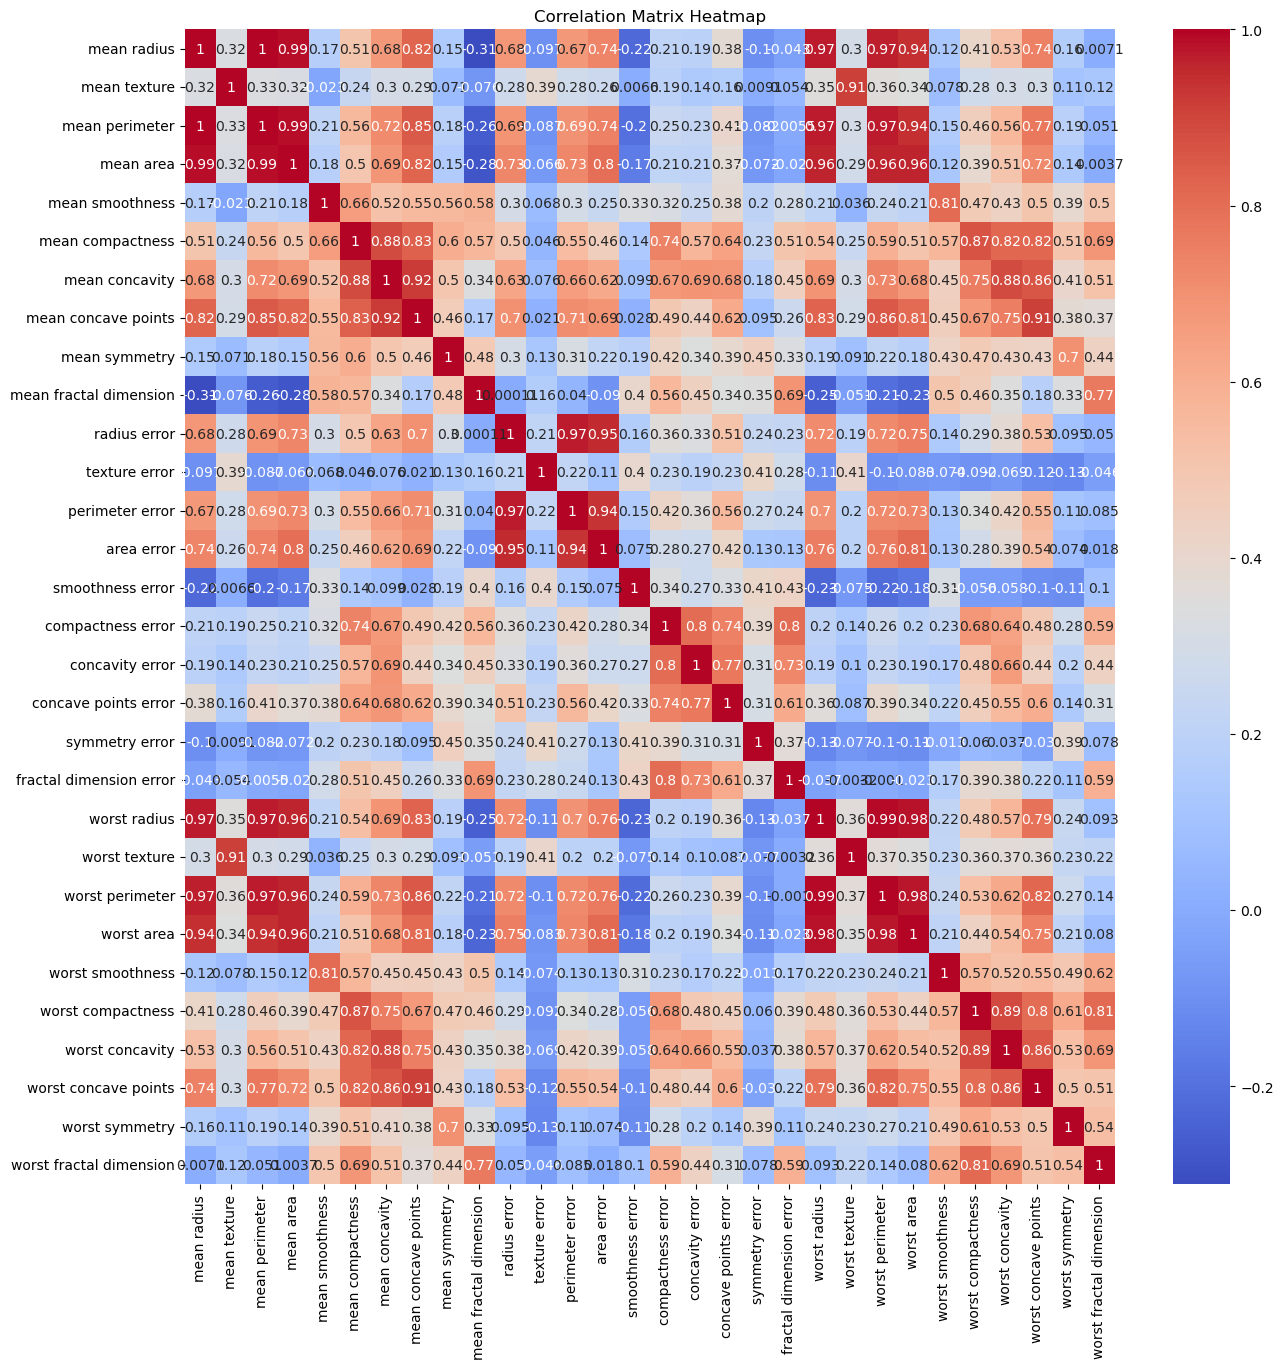

In [118]:
#correlation matrix heatmap
correlation_matrix=x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [119]:
skewness = x.skew()
skewed_features = skewness[abs(skewness) > 0.5]

In [120]:
# Apply transformations to handle skewness
for feature in skewed_features.index:
    # Log transformation
    x[feature] = np.log1p(x[feature])

In [121]:
# Verify the skewness after transformation
skewness_after_transform = x.skew()
print(skewness_after_transform)

mean radius                0.348744
mean texture               0.018733
mean perimeter             0.328800
mean area                  0.287328
mean smoothness            0.456324
mean compactness           1.043195
mean concavity             1.206982
mean concave points        1.083180
mean symmetry              0.632718
mean fractal dimension     1.272294
radius error               1.713417
texture error              0.629526
perimeter error            1.025375
area error                 0.847298
smoothness error           2.283394
compactness error          1.816278
concavity error            4.231738
concave points error       1.399869
symmetry error             2.135874
fractal dimension error    3.874373
worst radius               0.506347
worst texture              0.498321
worst perimeter            0.462758
worst area                 0.457614
worst smoothness           0.415426
worst compactness          1.048729
worst concavity            0.717939
worst concave points       0

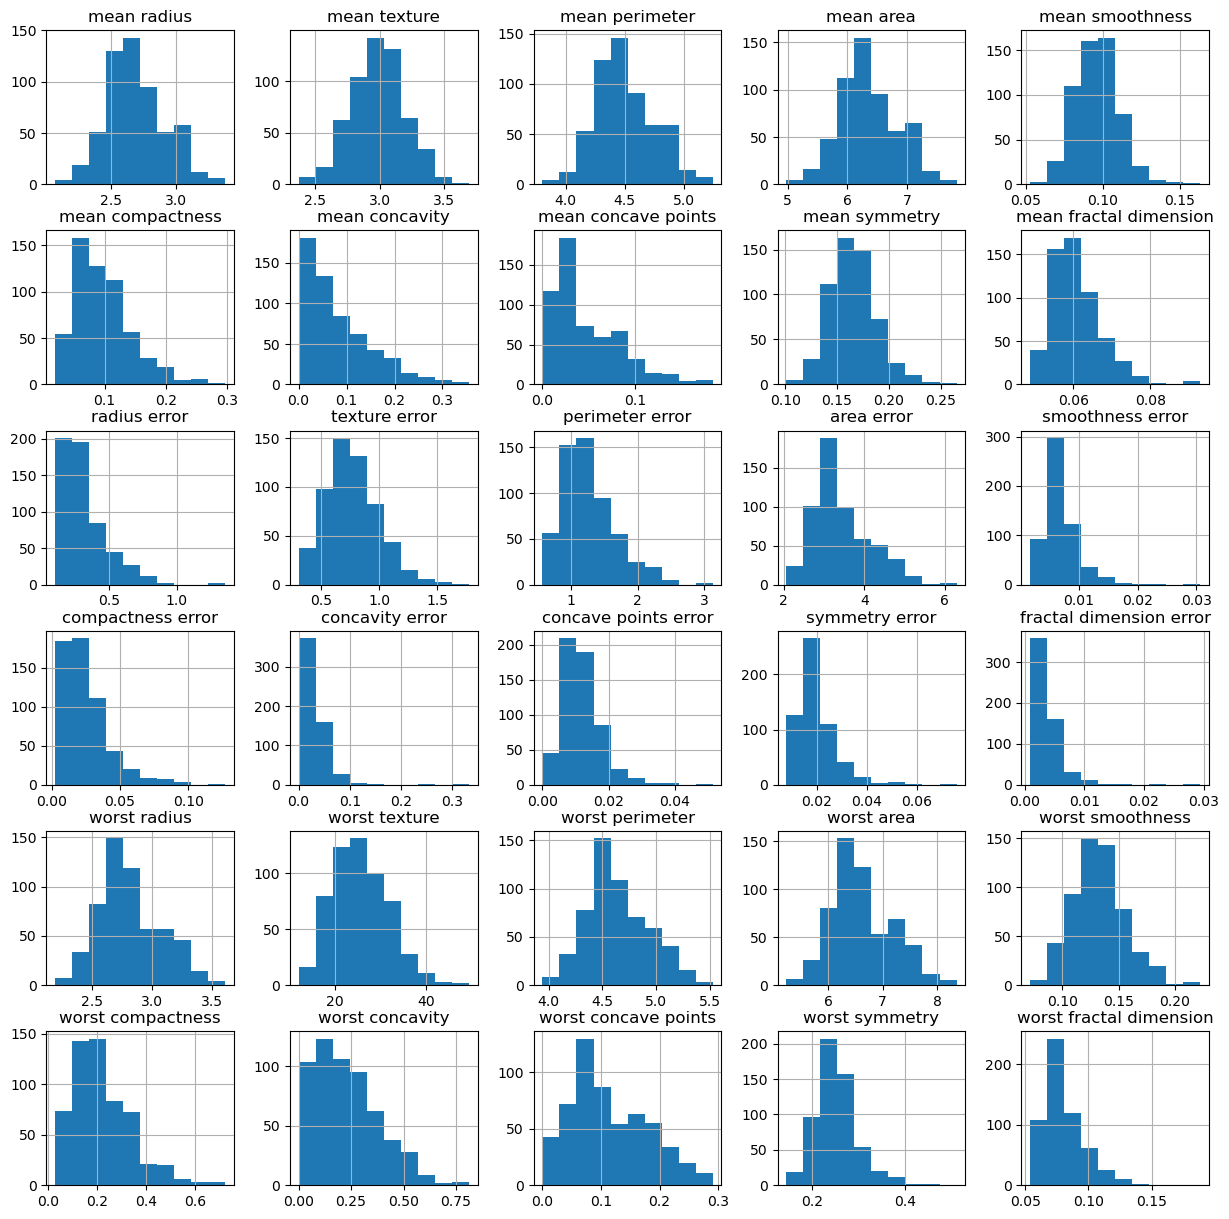

In [122]:
#Visualization of the transformed features (optional)
x.hist(figsize=(15,15))
plt.show()

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [125]:
#onehot encoded
y_encoded_df = pd.DataFrame(y_encoded, columns=['target'])
y_onehot = pd.get_dummies(y_encoded_df['target'], prefix='target')
y_onehot

,target_0,target_1
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
564,True,False
565,True,False
566,True,False
567,True,False


In [126]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [127]:
selector = SelectKBest(score_func=f_classif, k=10) 
X_new = selector.fit_transform(x_scaled, y_encoded)
X_new

array([[ 1.09706398,  1.26993369,  0.9843749 , ...,  2.00123749,
         2.10952635,  2.29607613],
       [ 1.82982061,  1.68595471,  1.90870825, ...,  1.89048899,
        -0.14674897,  1.0870843 ],
       [ 1.57988811,  1.56650313,  1.55888363, ...,  1.45628455,
         0.85497394,  1.95500035],
       ...,
       [ 0.70228425,  0.67267578,  0.57795264, ...,  0.42790561,
         0.3267666 ,  0.41406869],
       [ 1.83834103,  1.98252415,  1.73521799, ...,  1.65317077,
         3.19760468,  2.28998549],
       [-1.80840125, -1.81438851, -1.34778924, ..., -1.07581292,
        -1.30583065, -1.74506282]])

In [128]:
#Perform the split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#Display the shapes of the splits
print("Training features shape:", x_train.shape)
print("Testing feature shape:", x_test.shape)
print("Training target shape:", x_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (455, 30)
Testing feature shape: (114, 30)
Training target shape: (455, 30)
Testing target shape: (114,)


In [129]:
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.fit_transform(x_test)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
# Description: Logistic regression models the probability of a binary outcome (malignant or benign in this case) based on a linear combination of input features. It's a simple and efficient algorithm.
# Suitability: Suitable for this dataset due to its binary classification nature and interpretability.  It provides a baseline for comparison with more complex models.
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [132]:
y_pred = model.predict(x_test_scaled)

In [133]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [134]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
486    1
75     0
249    1
238    1
265    0
Length: 114, dtype: int32

In [135]:
#accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [136]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9912280701754386

In [137]:
print(f"Accuracy: {accuracy_score(y_test,y_pred):4f}")

Accuracy: 0.991228


In [138]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [139]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  1],
       [ 0, 71]], dtype=int64)

<Axes: >

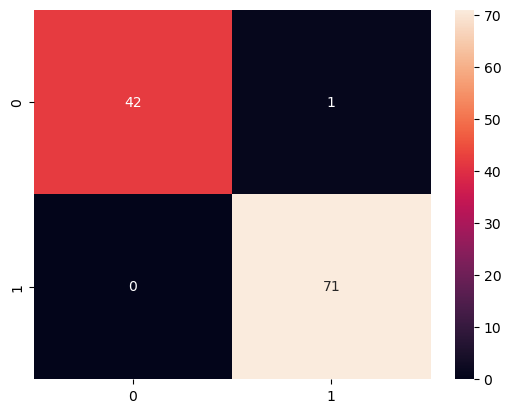

In [140]:
sns.heatmap(cm,annot = True)


In [141]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier

In [142]:
 #Description: Builds a tree-like model where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
# Suitability:  Can capture non-linear relationships in the data, potentially outperforming logistic regression.  However, prone to overfitting without proper pruning (max_depth parameter).
model_1 = DecisionTreeClassifier(random_state = 42,max_depth=10)
model_1.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [143]:
y_pred_dt = model_1.predict(x_test_scaled)

In [144]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.9210526315789473

In [145]:
#classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.92      0.96      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [146]:
cm_dt= confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[37,  6],
       [ 3, 68]], dtype=int64)

<Axes: >

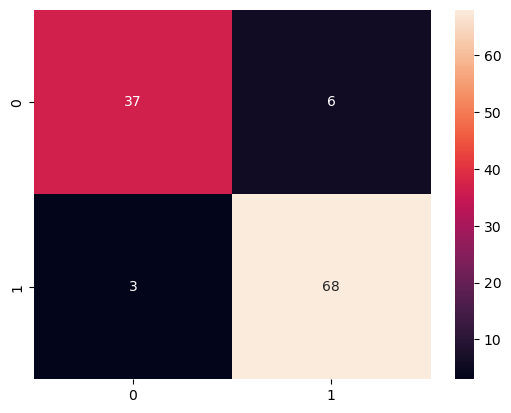

In [147]:
sns.heatmap(cm_dt,annot = True)

In [148]:
#svc import
from sklearn.svm import SVC

In [149]:
# Description:  Finds an optimal hyperplane that maximally separates the data points of different classes.  Uses kernel trick to handle non-linearly separable data.
# Suitability:  Effective in high-dimensional spaces, making it suitable for this dataset. The choice of kernel (default is RBF in this code) can impact performance.
model_2 = SVC(probability = True)
model_2.fit(x_train_scaled,y_train)

SVC(probability=True)

In [150]:
y_pred_svc = model_2.predict(x_test)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [151]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.37719298245614036

In [152]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
print("\nConfusion Matrix:")
cm_svc = confusion_matrix(y_test, y_pred_svc)


Confusion Matrix:


<Axes: >

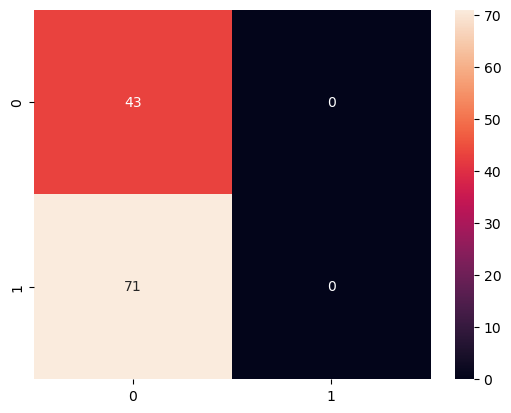

In [154]:
sns.heatmap(cm_svc,annot = True)

In [155]:
#roc curve true +ve flase +ve auc = area under curve
from sklearn.metrics import roc_curve,auc

In [156]:
fpr,tpr,_ = roc_curve(y_test,y_pred_svc)
roc_auc = auc(fpr,tpr)

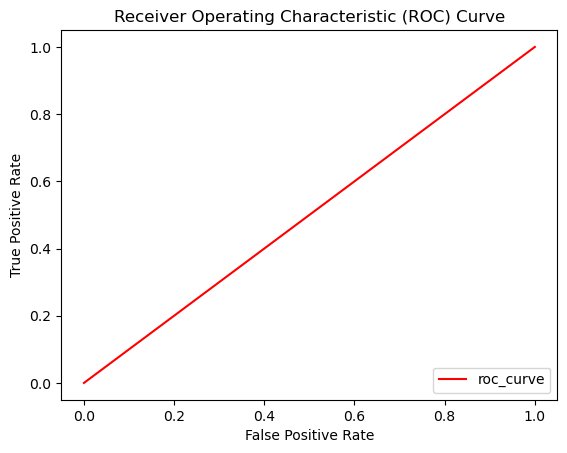

In [157]:
plt.figure()
plt.plot(fpr,tpr,color = 'red',label = 'roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [158]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [159]:
# Description: Classifies a data point based on the majority class among its k nearest neighbors.
# Suitability:  Simple and easy to understand, but can be computationally expensive for large datasets. Performance depends heavily on the choice of k and the distance metric.
model_3 = KNeighborsClassifier(n_neighbors = 5)
model_3.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [160]:
y_pred_knn = model_3.predict(x_test)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [161]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.37719298245614036

In [162]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\navya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [163]:
from sklearn.naive_bayes import GaussianNB

In [164]:
# Description:  Applies Bayes' theorem with a strong (naive) independence assumption between the features.
# Suitability:  Fast and efficient, but the independence assumption may not hold true for all features in this dataset.  It serves as a quick baseline.
model_4 = GaussianNB()
model_4.fit(x_train_scaled,y_train)

GaussianNB()

In [165]:
y_pred_nb = model_4.predict(x_test)

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [166]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.37719298245614036

In [167]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [168]:
# Description: An ensemble method that constructs multiple decision trees and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
# Suitability:  Generally robust and performs well on various datasets, including high-dimensional ones like this.  Less prone to overfitting than single decision trees.
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

In [169]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [170]:
y_pred_rf = rf_model.predict(x_test)

In [171]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.9649122807017544

In [172]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [173]:
# Gradient Boosting
# Description: Another ensemble method that builds trees sequentially, where each subsequent tree corrects the errors made by the previous trees.
# Suitability: Often achieves high accuracy but can be sensitive to hyperparameter tuning.  It might be one of the better performing algorithms on this dataset because it handles complex relationships well.
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [174]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [175]:
y_pred_gb_booster=gb_model.predict(x_test,)

In [176]:
accuracy_gb_booster = accuracy_score(y_test,y_pred_gb_booster)
accuracy_gb_booster

0.956140350877193

In [79]:
print(classification_report(y_test,y_pred_gb_booster))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [97]:
# Create a dictionary to store the accuracy of each model
model_accuracies = {
    "Logistic Regression": accuracy,
    "Decision Tree": accuracy_dt,
    "Support Vector Machine": accuracy_svc,
    "K-Nearest Neighbors": accuracy_knn,
    "Naive Bayes": accuracy_nb,
    "Random Forest": accuracy_rf,
    "Gradient Boosting": accuracy_gb_booster
}


In [99]:
# Find the best and worst performing models
best_model = max(model_accuracies, key=model_accuracies.get)
worst_model = min(model_accuracies, key=model_accuracies.get)

print(f"Model Accuracies: {model_accuracies}")
print(f"The best performing model is: {best_model} with an accuracy of {model_accuracies[best_model]:.4f}")
print(f"The worst performing model is: {worst_model} with an accuracy of {model_accuracies[worst_model]:.4f}")

Model Accuracies: {'Logistic Regression': 0.9912280701754386, 'Decision Tree': 0.9210526315789473, 'Support Vector Machine': 0.37719298245614036, 'K-Nearest Neighbors': 0.37719298245614036, 'Naive Bayes': 0.37719298245614036, 'Random Forest': 0.9649122807017544, 'Gradient Boosting': 0.956140350877193}
The best performing model is: Logistic Regression with an accuracy of 0.9912
The worst performing model is: Support Vector Machine with an accuracy of 0.3772
